In [208]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

## Question-1

In [209]:
#define a function for adding label to the train and test data
#matrix--> features
#label--> label to be added

def addLabel(matrix, label):
    row = len(matrix)
    y_1 = np.array([label for i in range(row)])       #array with length equal to length of the matrix with all elements =label
    matrix = np.insert(matrix,2,y_1,axis=1)           #insert this as a column to the exixsting matrix
    return matrix

In [ ]:
#processing train data and adding labels 1,2 1nd 3

In [210]:
#load data from txt file as an array
class1_train = np.loadtxt('class1_train.txt')
class2_train = np.loadtxt('class2_train.txt')
class3_train = np.loadtxt('class3_train.txt')

In [211]:
#add label to the each data
class1_train = addLabel(class1_train, 1)
class2_train = addLabel(class2_train, 2)
class3_train = addLabel(class3_train, 3)

In [212]:
#cobine all three classes as train data
train_data = np.append(class1_train,class2_train,axis=0)
train_data = np.append(train_data,class3_train,axis=0)
#train_data

In [213]:
train_x = train_data[:,:2]                     #train_x is first two column of the train_data
train_y = train_data[:, -1].astype(int)        #train_y is last column of the train_data
train_x, train_y

(array([[ 0.22315 , -0.021698],
        [-0.62173 ,  2.9335  ],
        [-0.98655 , -1.0069  ],
        ...,
        [ 8.7813  , -9.3036  ],
        [ 9.8707  , -8.9443  ],
        [11.858   , -9.1104  ]]),
 array([1, 1, 1, ..., 3, 3, 3]))

In [ ]:
#processing test data and adding labels 1,2 1nd 3

In [214]:
#load data from the test files as array
class1_test = np.loadtxt('class1_test.txt')
class2_test = np.loadtxt('class2_test.txt')
class3_test = np.loadtxt('class3_test.txt')

In [215]:
#add label to  the test data
class1_test = addLabel(class1_test, 1)
class2_test = addLabel(class2_test, 2)
class3_test = addLabel(class3_test, 3)

In [216]:
#combine all test data together to and store in test_data
test_data = np.append(class1_test,class2_test,axis=0)
test_data = np.append(test_data,class3_test,axis=0)
#test_data

In [218]:
test_x = test_data[:,:2]                      #test_x is first two column of test_data
test_y = test_data[:, -1].astype(int)         #test_y is last colun of test_data
#test_x, test_y

In [ ]:
#Gaussian Naive Bayes classification 

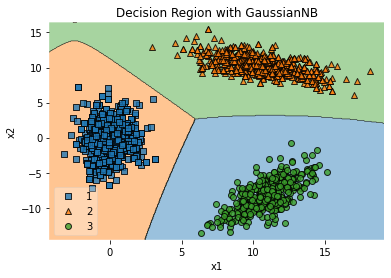

In [219]:
clf = GaussianNB()                                   #define clasifier as Gaussian Naive Bayes
clf.fit(train_x, train_y)                            #fit the model

# plotting the decision regions
plot_decision_regions(train_x, train_y, clf=clf, legend=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Region with GaussianNB')
plt.show()

In [220]:
#printing confusion matrix for train and test data
print("Confusion matrix for train data:")
print(confusion_matrix(train_y, clf.predict(train_x)))

print("Confusion matrix for test data:")
print(confusion_matrix(test_y, clf.predict(test_x)))


Confusion matrix for train data:
[[650   0   0]
 [  0 650   0]
 [  0   0 400]]
Confusion matrix for test data:
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


In [236]:
#printing accuracy score for test and train data

print("Accuracy score for train data:", end=' ')
print(accuracy_score(train_y, clf.predict(train_x)))


print("Accuracy score for test data:", end=' ')
print(accuracy_score(test_y, clf.predict(test_x)))

Accuracy score for train data: 1.0
Accuracy score for test data: 1.0


###### Observations

1. Off diagonal elements of confusion matrix are zeros for both train_data and test_data, which means classifier predicted all  entries correctly for both these data.
2. Decision boundaries are non-linear.
3. Accuracy score is 1, i.e. model perform with 100% accuracy. All points are with in the respective boundaries.


## Question-2

In [255]:
#import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [256]:
#generate dataset from sklearn datasets
X, y = make_blobs(n_samples=100,centers=2,n_features=2,random_state=0)
#X,y

In [257]:
#split data in to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

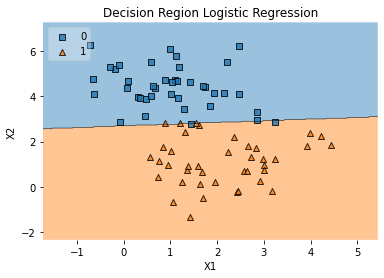

In [258]:
clf=LogisticRegression(random_state=0)                      #initialize classifier as logistic regression
clf.fit(X_train, y_train)                                   #fit the model

#plot decision boundaries
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Decision Region Logistic Regression")
plt.show()

In [259]:
#print confusion matrix for train and test data
print("Confusion matrix for train data:")
print(confusion_matrix(y_train, clf.predict(X_train)))

print("Confusion matrix for test data:")
print(confusion_matrix(y_test, clf.predict(X_test)))

Confusion matrix for train data:
[[38  2]
 [ 3 37]]
Confusion matrix for test data:
[[ 8  2]
 [ 0 10]]


In [260]:
#print accuracy scores for train and test data
print("Accuracy score for train data:", end=' ')
print(accuracy_score(y_train, clf.predict(X_train)))


print("Accuracy score for test data:", end=' ')
print(accuracy_score(y_test, clf.predict(X_test)))

Accuracy score for train data: 0.9375
Accuracy score for test data: 0.9


###### Observations

1. From the confusion matrix of train data 
True positive =38 (Actual= 1, predicted= 1), and False positive= 2(actual=0, pedicted=1) ie two points with label 0 is in the boundary of 1
True negative =37 (Actual= 0, predicted= 0), and False negative= 3(actual=1, pedicted=0)ie ie three points with label 1 is in the boundary of 0


2. From the confusion matrix of test data 
True positive =8 (Actual= 1, predicted= 1), and False positive= 2(actual=0, pedicted=1) ie two points with label 0 is in the boundary of 1
True negative =10 (Actual= 0, predicted= 0), and False negative= 0(actual=1, pedicted=0)ie ie no points with label 1 is in the boundary of 0 

3. Diagonal of the confusion matrix is densce, so the classifier perform better
4. Accuracy of the classifier with train data is 93.75% and with test data 90%
5. Decision boundary is linear 

